Applying the regressors to output infrared fluxes in the atmosphere (first try some middle layer).

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'af'
DS = xr.open_dataset(dataDIR)

In [3]:
albedo = DS.ALBEDO.values

In [4]:
albedo.shape #days, latitude, longtitude

(71, 36, 72)

In [5]:
d_c = DS.TAU_OD.values

In [6]:
d_c.shape 

(71, 52, 36, 72)

In [7]:
tsf = DS.TOALW.values #top solar flux for infrared

In [8]:
tsf.shape

(71, 36, 72)

In [9]:
msf = DS.DOWNIRFLUX.values[:,25,:,:] #some middle layer in the down infrared flux

In [10]:
msf.shape

(71, 36, 72)

In [11]:
msf2 = msf/(1-albedo)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [12]:
e_t = [] #equator input and output
#input:
for k in range(10): #10 days
    for i in range(36):
        for j in range(72):
            input_array = list(d_c[k,:,i,j]) #add dust profile
            input_array.append(tsf[k,i,j]) #add top solar flux, without the albedo factor
            input_array.append(msf2[k,i,j])            
            e_t.append(input_array) #appends input to input array

In [13]:
e_t = np.array(e_t)
e_t.shape

(25920, 54)

In [15]:
pd.DataFrame(e_t)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,0.120338,0.119857,0.119135,0.117931,0.116728,0.115525,0.114321,0.113118,0.111914,0.110711,...,1.091246e-07,7.654454e-08,5.219346e-08,3.431266e-08,2.151059e-08,1.257493e-08,6.654015e-09,3.126207e-09,76.076691,2.231272
25916,0.120377,0.119895,0.119173,0.117969,0.116766,0.115562,0.114358,0.113154,0.111951,0.110747,...,1.091595e-07,7.656890e-08,5.220998e-08,3.432344e-08,2.151725e-08,1.257871e-08,6.655889e-09,3.126946e-09,76.511009,2.226940
25917,0.120411,0.119929,0.119207,0.118003,0.116799,0.115594,0.114390,0.113186,0.111982,0.110778,...,1.091901e-07,7.659027e-08,5.222449e-08,3.433289e-08,2.152309e-08,1.258202e-08,6.657535e-09,3.127596e-09,76.951157,2.222255
25918,0.120440,0.119959,0.119236,0.118032,0.116827,0.115623,0.114418,0.113214,0.112010,0.110805,...,1.092166e-07,7.660883e-08,5.223708e-08,3.434110e-08,2.152816e-08,1.258490e-08,6.658964e-09,3.128160e-09,77.395775,2.217276


In [18]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,52] != 0] #remove 0 flux, could later use a simple classifier to determine which data has 0 bottom flux...

In [19]:
e_d

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
2592,0.074773,0.074461,0.073992,0.073209,0.072426,0.071643,0.070858,0.070073,0.069288,0.068501,...,6.870778e-08,4.828668e-08,3.302351e-08,2.181589e-08,1.379160e-08,8.190756e-09,4.479549e-09,2.268331e-09,27.582304,0.496744
2593,0.074851,0.074538,0.074069,0.073286,0.072502,0.071718,0.070933,0.070147,0.069360,0.068573,...,6.877530e-08,4.833389e-08,3.305554e-08,2.183677e-08,1.380450e-08,8.198081e-09,4.483181e-09,2.269765e-09,27.580229,0.500730
2594,0.074881,0.074568,0.074098,0.073315,0.072531,0.071746,0.070961,0.070175,0.069388,0.068601,...,6.880115e-08,4.835196e-08,3.306780e-08,2.184476e-08,1.380943e-08,8.200886e-09,4.484573e-09,2.270314e-09,27.574709,0.504819
2595,0.074862,0.074549,0.074080,0.073297,0.072513,0.071729,0.070943,0.070158,0.069371,0.068583,...,6.878514e-08,4.834077e-08,3.306021e-08,2.183981e-08,1.380637e-08,8.199148e-09,4.483712e-09,2.269974e-09,27.565815,0.508992
2596,0.074796,0.074483,0.074014,0.073232,0.072448,0.071665,0.070880,0.070095,0.069309,0.068522,...,6.872747e-08,4.830045e-08,3.303285e-08,2.182198e-08,1.379536e-08,8.192893e-09,4.480609e-09,2.268749e-09,27.553602,0.513228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,0.120338,0.119857,0.119135,0.117931,0.116728,0.115525,0.114321,0.113118,0.111914,0.110711,...,1.091246e-07,7.654454e-08,5.219346e-08,3.431266e-08,2.151059e-08,1.257493e-08,6.654015e-09,3.126207e-09,76.076691,2.231272
25916,0.120377,0.119895,0.119173,0.117969,0.116766,0.115562,0.114358,0.113154,0.111951,0.110747,...,1.091595e-07,7.656890e-08,5.220998e-08,3.432344e-08,2.151725e-08,1.257871e-08,6.655889e-09,3.126946e-09,76.511009,2.226940
25917,0.120411,0.119929,0.119207,0.118003,0.116799,0.115594,0.114390,0.113186,0.111982,0.110778,...,1.091901e-07,7.659027e-08,5.222449e-08,3.433289e-08,2.152309e-08,1.258202e-08,6.657535e-09,3.127596e-09,76.951157,2.222255
25918,0.120440,0.119959,0.119236,0.118032,0.116827,0.115623,0.114418,0.113214,0.112010,0.110805,...,1.092166e-07,7.660883e-08,5.223708e-08,3.434110e-08,2.152816e-08,1.258490e-08,6.658964e-09,3.128160e-09,77.395775,2.217276


This function splits the training data, into n_split groups, according to percentiles of a value located at special index s_index. Then, it trains n_split regressors, each on its respective group, and then outputs these. The ith regressor is trained on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [24]:
from sklearn.linear_model import LinearRegression


def sat(training_data, n_split, s_index): 
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:53] #training input
        train_out = i_data[:,53] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out)
        regressor_list.append(lri)
    
    return regressor_list

This function is almost identical to the above, except that it minimizes relative error instead of RMSE, using custom weightings.

In [25]:
from sklearn.linear_model import LinearRegression


def satr(training_data, n_split, s_index): #split and train, relative error version
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:53] #training input
        train_out = i_data[:,53] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out, sample_weight = 1/train_out**2)
        regressor_list.append(lri)
    
    return regressor_list

This function predicts the output according to the n_split regressors, where the ith regressor is used on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [26]:
def s_predict(in_data, reg_list, s_index): #predict the output using previously obtained linear regressor list
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        for i in range(len(reg_list)):
            upper_bound = np.percentile(in_data[:,s_index], (i+1) * 100/len(reg_list))
            lower_bound = np.percentile(in_data[:,s_index], i * 100/len(reg_list))
            if instance[s_index] < upper_bound and instance[s_index] >= lower_bound: 
                out_data.append(float(reg_list[i].predict(instance[:53].reshape(1,-1)))) #predicts using a certain regressor
        if(instance[s_index] == np.max(in_data[:,s_index])): #the search right above ignores the absolute maximum element
            out_data.append(float(reg_list[-1].predict(instance[:53].reshape(1,-1)))) #uses lin reg for largest elements
    return np.array(out_data)   

In [27]:
lr_list = sat(e_d, 10, 52) #linear regressor list, let's try 10 regressors
custom_out = s_predict(e_d, lr_list, 52)

In [ ]:
#rlr_list = satr(e_d, 10, 52) #relative error minimizing linear regressor list
#custom_out2 = s_predict(e_d, rlr_list, 52)

In [28]:
total_in = e_d.iloc[:,:53] #total input
total_out = e_d.iloc[:,53] #total output

In [30]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, custom_out)
lin_rmse = np.sqrt(lin_mse)
print("Error for RMSE minimizing regressors:" + str(lin_rmse)) #basically the same error, great!
#lin_rel = mean_squared_error(total_out, custom_out2)
#lin_rel = np.sqrt(lin_rel)
#print("Error for relative error minimizing regressors:" + str(lin_rel)) #slightly higher but still pretty low

Error for RMSE minimizing regressors:0.1568209584583357


Area integration of error:

In [31]:
def int_err(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        dA =  -r**2 * np.sin((np.pi/36)*((real_in.index[i]//72)%36)) * (np.pi/36) * (np.pi/36)  #area increment
        areas.append(dA)
    areas = np.array(areas)
    return np.sum((np.array(pred) - np.array(real))*areas)

In [32]:
err1 = int_err(custom_out, total_out, total_in, 3.39e6) #the integral of the error
np.array(err1)/(1.44e14)/10 #divide by surface area of mars, number of time samples, to get norm. error for single time sample 

-0.0021362688256438686

In [ ]:
#err2 = int_err(custom_out2, total_out, total_in, 3.39e6) #the integral of the error
#np.array(err2)/(1.44e14)/10 #about 25 times larger, still really small! This is in W/m^2 units.

## Plotting data:

In [33]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 5*36*72] 
ti_indices = ti_indices[ti_indices < 6 *36*72] 
ti_indices #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

Int64Index([12961, 12962, 12963, 12964, 12965, 12966, 12967, 12968, 12969,
            12970,
            ...
            15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550,
            15551],
           dtype='int64', length=2591)

In [36]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
full_pred_contour = np.full((36, 72), np.nan)
#full_pred_contour2 = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_out_contour[lat_point][long_point] = total_out[np.where(all_indices == index)]
    full_pred_contour[lat_point][long_point] = custom_out[np.where(all_indices == index)]
    #full_pred_contour2[lat_point][long_point] = custom_out2[np.where(all_indices == index)]

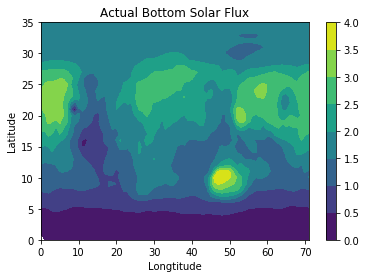

<Figure size 432x288 with 0 Axes>

In [37]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

### Plots for RMSE minimizing regressors:

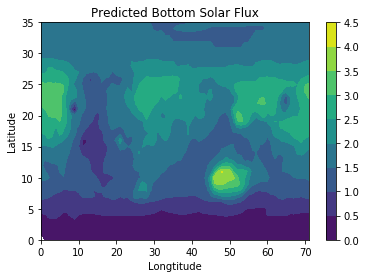

<Figure size 432x288 with 0 Axes>

In [38]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

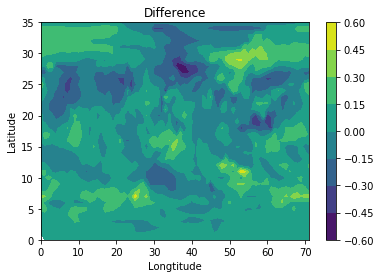

In [39]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

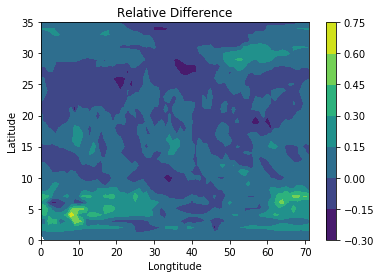

In [40]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #some massive relative errors at the edge

### Plots for relative error minimizing regressors:

In [ ]:
plt.contourf(full_pred_contour2)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

In [ ]:
plt.contourf(full_pred_contour2 - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
plt.contourf((full_pred_contour2 - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #small relative errors, nice